# Connect to GDrive and set working directory
## !! Skip if you run in local !!
1. Add a shortcut for working directory('IDPCode') to your drive as depicted below:
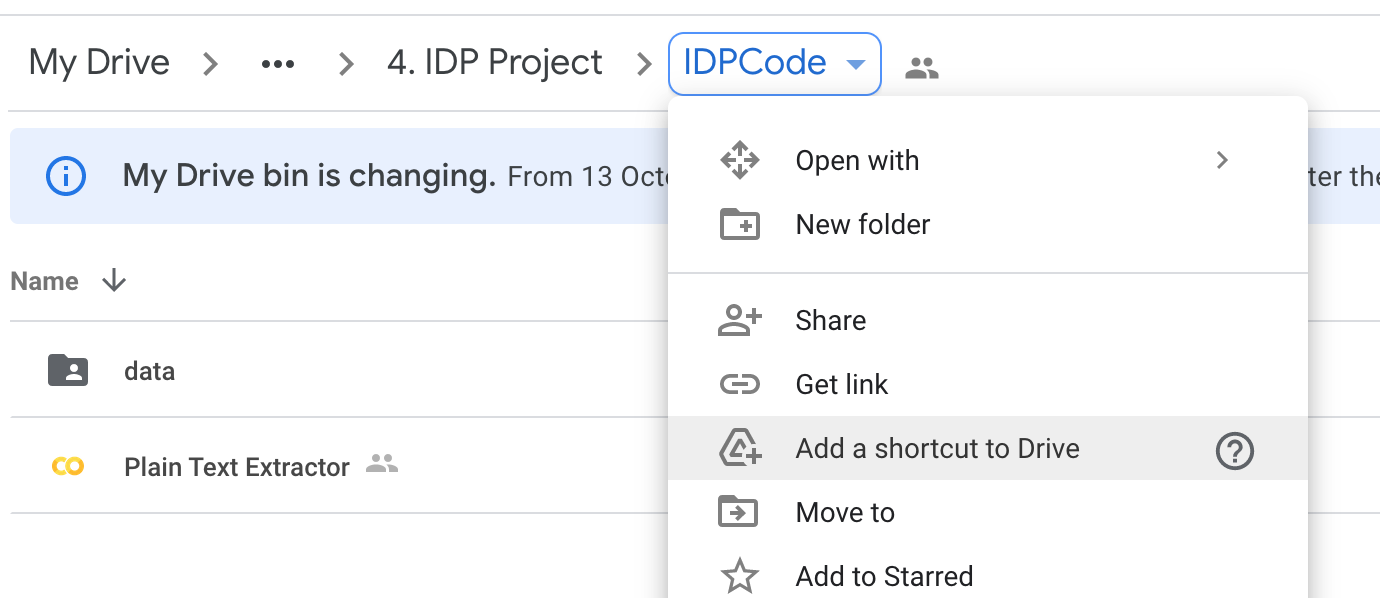
2. Run the command below to connect the GDrive:


In [ ]:
# https://github.com/njanakiev/folderstats
# https://janakiev.com/blog/python-filesystem-analysis/
# https://networkx.org/documentation/stable/
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/IDPCode/

In [52]:
!pip install xlrd
!pip install spacy
!pip install gensim
!pip install ipython-autotime
!pip install pickle5

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



     |████████████████████████████████| 132 kB 2.1 MB/s eta 0:00:01     |███████████████████████████▎    | 112 kB 2.1 MB/s eta 0:00:01
  Created wheel for pickle5: filename=pickle5-0.0.11-cp38-cp38-macosx_10_14_x86_64.whl size=126709 sha256=6fab299f6ebf637c299c5cc874f249355fcb31499f4e005ee2490cf654a3c303
  Stored in directory: /Users/farukcankaya/Library/Caches/pip/wheels/25/d4/61/dbd8edd1a0d656be7b4267c85db3b61951eb60016a0154a122
Successfully built pickle5
time: 13.1 s


# Start from here if you run in local !!

In [60]:
import pandas as pd
import numpy as np
import pickle5 as pickle
import gensim

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# show execution time of cells
%load_ext autotime

# CHANGE PATH FOR THE DATASET FOLDER
DATA_DIRECTORY='/Users/farukcankaya/Google Drive/AllPapers'


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.18 ms


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# 1. Data pre-processing

In [2]:
# dt = Dataset Tika
dt = pd.read_pickle('dt_normalized.pkl') # https://drive.google.com/file/d/1THBPXX4wsHDQDDqImqaTkbGuc_VPzT2J/view?usp=sharing

time: 581 ms


In [55]:
picklefile = open('dt_normalized_python36.pkl', 'wb')
#pickle the dataframe
pickle.dump(dt, picklefile)
#close file
picklefile.close()

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



time: 2.26 s


In [3]:
# Utility functions
def remove_dollar_sign(text):
  '''
  While drawing title count distribution, mathplotlib throws an error.
  Because some titles have dollar sign('$'). This method is used to clear the sign.
  '''
  
  text = str(text).replace('$', '\$')
  return text

import re
import string
def clean_text(text):
  '''
  Eliminates links, non alphanumerics, and punctuation.
  Returns lower case text.
  '''  
  
  # Convert to string
  text = str(text)
  # Remove links
  text = re.sub('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+','', text)
  # Remove non-alphanumerics
  text = re.sub('\w*\d\w*', ' ', text)
  # Remove punctuation and lowercase
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text.lower())
  # Remove newline characters
  text = text.replace('\n', ' ')
  # Remove text in square brackets
  text = re.sub(r'\[.*?\]', '', text)
  # Remove words containing numbers
  text = re.sub(r'\w*\d\w*', '', text)
    
  return text

def lemmatizer(text):        
  sent = []
  doc = nlp(text)
  for word in doc:
    sent.append(word.lemma_)
    
  return " ".join(sent)

def remove_stopwords(text):
  clean_text = []
  for word in text.split(' '):
    if word not in stop_list and (len(word) > 2):
      clean_text.append(word)
  
  return ' '.join(clean_text)

def display_topics(model, feature_names, no_top_words, no_top_topics, topic_names=None):
  count = 0
  for ix, topic in enumerate(model.components_):
    if count == no_top_topics:
      break
    if not topic_names or not topic_names[ix]:
      print("\nTopic ", (ix + 1))
    else:
      print("\nTopic: '",topic_names[ix],"'")
    print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words-1:-1]]))
    count += 1

  

time: 1.71 ms


## TODO: Find accounting related stop words

In [21]:
# TODO:!!!!
# Find accounting related stop words
LIST_OF_ACCOUNTING_RELATED_STOP_WORDS = ['accounting','firms','research','audit','financial','paper','information','les','des','que','dans','sur','par','qui','est','aux','une']

time: 418 µs


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## 1.4. Remove stop words

In [24]:
from gensim.parsing.preprocessing import STOPWORDS

stop_list = STOPWORDS.union(set(LIST_OF_ACCOUNTING_RELATED_STOP_WORDS))

# Remove stopwords
dt['content_accounting_stop_words'] = dt['content_stop_words'].apply(remove_stopwords)

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



time: 3.19 s


### Lemmatization

In [27]:
import spacy
nlp = spacy.load('en')
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)
  
dt['content_lemmatized'] = dt['content_accounting_stop_words'].apply(lemmatizer)
dt['content_lemmatized_clean'] = dt['content_lemmatized'].str.replace('-PRON-', '')

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



time: 21min 11s


## 1.5. Stemming
May lead to confusion, think about that again!!!

In [6]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
    word_list = []
    for word in text.split(' '):
        word_list.append(stemmer.stem(word))
    return ' '.join(word_list)
  
dt['content_stemmed'] = dt['content_stop_words'].apply(stem_text)

time: 4min 14s


Difference between `dt['content'].head(1)` and `dt['content_stemmed'].head(1)`
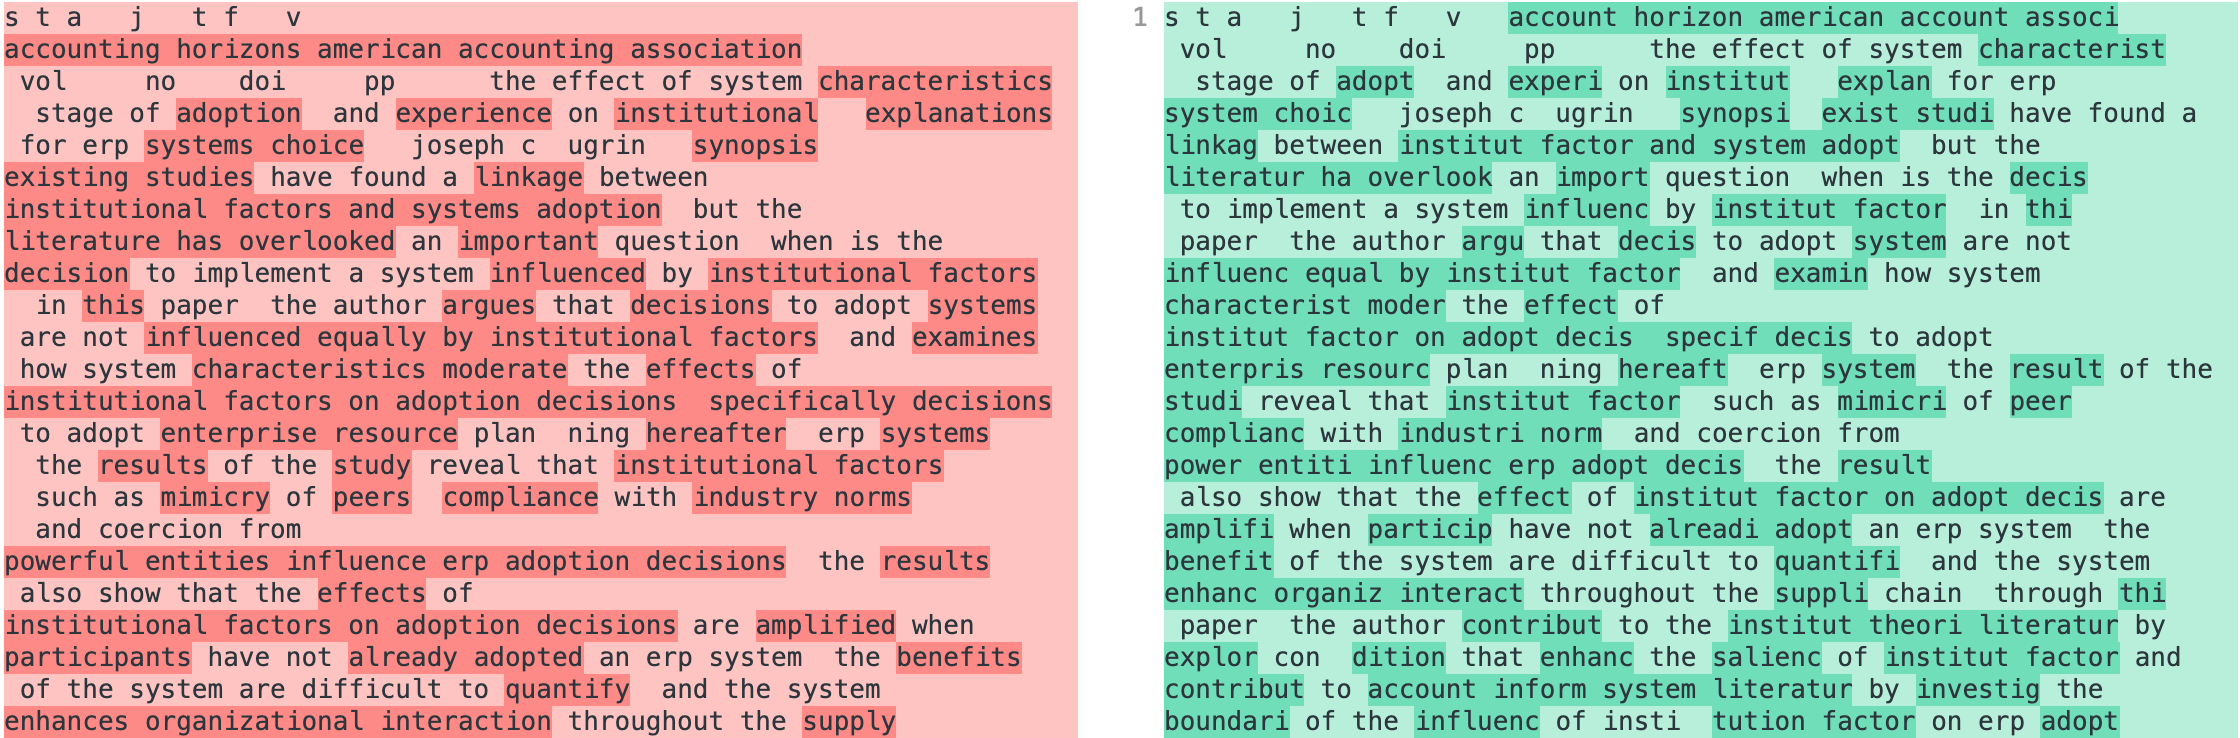

In [30]:
dt3c = pd.DataFrame(dt, columns=['file_path', 'total_page_count', 'content_stop_words', 'content_stemmed', 'content_lemmatized', 'content_lemmatized_clean'])

time: 10.4 ms


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [31]:
dt3c.to_pickle('normalized_lemmatized.pkl')

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



time: 705 ms


In [32]:
dt3c.head(1)

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



file_path  \
0  /Users/farukcankaya/Google Drive/AllPapers/8_AH/711_AH.pdf   

   total_page_count  \
0                25   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

time: 15.5 ms


In [33]:
from wordcloud import WordCloud

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_list,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(dt3c['content_lemmatized_clean']))

print(wordcloud)

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



time: 1min 10s


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



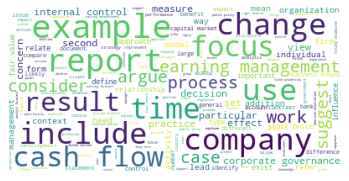

time: 182 ms


In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [35]:
NUM_OF_TOPICS = 8
NUM_OF_WORDS_IN_EACH_TOPIC = 20

time: 470 µs


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Unigrams

In [38]:
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(dt3c['content_lemmatized_clean'], NUM_OF_WORDS_IN_EACH_TOPIC)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top {} unigrams in the paper after removing stop words".format(NUM_OF_WORDS_IN_EACH_TOPIC)))
fig.show()

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



time: 19.6 s


## Bigrams

In [39]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(dt3c['content_lemmatized_clean'], NUM_OF_WORDS_IN_EACH_TOPIC)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top {} bigrams in the paper after removing stop words".format(NUM_OF_WORDS_IN_EACH_TOPIC)))
fig.show()

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



time: 58.5 s


In [111]:
dt3c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11682 entries, 0 to 15750
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   file_path                 11682 non-null  object
 1   total_page_count          11682 non-null  int64 
 2   content_stop_words        11682 non-null  object
 3   content_stemmed           11682 non-null  object
 4   content_lemmatized        11682 non-null  object
 5   content_lemmatized_clean  11682 non-null  object
dtypes: int64(1), object(5)
memory usage: 958.9+ KB
time: 15.3 ms


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [112]:
dt3c.reset_index(drop=True, inplace=True)
dt3c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11682 entries, 0 to 11681
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   file_path                 11682 non-null  object
 1   total_page_count          11682 non-null  int64 
 2   content_stop_words        11682 non-null  object
 3   content_stemmed           11682 non-null  object
 4   content_lemmatized        11682 non-null  object
 5   content_lemmatized_clean  11682 non-null  object
dtypes: int64(1), object(5)
memory usage: 547.7+ KB
time: 15.3 ms


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [113]:
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn

count_vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                       
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=5000,          
                            )

data_vectorized = count_vectorizer.fit_transform(dt3c['content_lemmatized_clean'])

lda_model = LatentDirichletAllocation(n_components=NUM_OF_TOPICS, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, count_vectorizer, mds='tsne')

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2     -108.958252 -208.941483       1        1  21.096886
6      186.487061  -98.103249       2        1  17.877714
4       19.245832  160.858780       3        1  13.389179
7      170.658829   75.445076       4        1  12.805648
0       -1.386411  -35.043739       5        1  11.862251
5     -145.800095  106.944611       6        1   9.608366
1       64.834541 -221.825272       7        1   9.313165
3     -196.906036  -58.990913       8        1   4.046792, topic_info=                  Term          Freq         Total Category  logprob  loglift
363            auditor  44647.000000  44647.000000  Default  30.0000  30.0000
4753        university  50453.000000  50453.000000  Default  29.0000  29.0000
4514               tax  29003.000000  29003.000000  Default  28.0000  28.0000
1466           earning  48490.000000  48490.000000  Default  27.0000  27.0000
4792             value  35598.000000  35598.000000  Default  26.0000  26.0000
3355       performance  27821.000000  27821.000000  Default  25.0000  25.0000
2529           journal  19836.000000  19836.000000  Default  24.0000  24.0000
773             client  14453.000000  14453.000000  Default  23.0000  23.0000
202            analyst  19004.000000  19004.000000  Default  22.0000  22.0000
1347        disclosure  27382.000000  27382.000000  Default  21.0000  21.0000
1046         corporate  22342.000000  22342.000000  Default  20.0000  20.0000
316              asset  15355.000000  15355.000000  Default  19.0000  19.0000
2415          internal  19266.000000  19266.000000  Default  18.0000  18.0000
1875          forecast  16491.000000  16491.000000  Default  17.0000  17.0000
3851            report  43458.000000  43458.000000  Default  16.0000  16.0000
3942              risk  31130.000000  31130.000000  Default  15.0000  15.0000
2008        governance  12492.000000  12492.000000  Default  14.0000  14.0000
2276            income  14498.000000  14498.000000  Default  13.0000  13.0000
838            company  27639.000000  27639.000000  Default  12.0000  12.0000
4346             stock  22611.000000  22611.000000  Default  11.0000  11.0000
1072           country  14035.000000  14035.000000  Default  10.0000  10.0000
1061              cost  32851.000000  32851.000000  Default   9.0000   9.0000
4303          standard  19801.000000  19801.000000  Default   8.0000   8.0000
415               bank  10066.000000  10066.000000  Default   7.0000   7.0000
2982             model  26865.000000  26865.000000  Default   6.0000   6.0000
3659           quality  24853.000000  24853.000000  Default   5.0000   5.0000
1015           control  29061.000000  29061.000000  Default   4.0000   4.0000
2832            market  42041.000000  42041.000000  Default   3.0000   3.0000
362           auditing  16267.000000  16267.000000  Default   2.0000   2.0000
1808               fee  10210.000000  10210.000000  Default   1.0000   1.0000
2463               ipo   2737.232654   2738.131563   Topic1  -6.4387   1.5557
223       announcement   6928.938972   6932.897252   Topic1  -5.5099   1.5555
1875          forecast  16481.863973  16491.884160   Topic1  -4.6434   1.5554
2961        mispricing    622.662662    623.547664   Topic1  -7.9194   1.5546
566          brokerage    564.300009    565.185907   Topic1  -8.0178   1.5545
4521               tbe    549.168564    550.071080   Topic1  -8.0450   1.5544
4100               seo    435.672438    436.558811   Topic1  -8.2765   1.5540
588             bushee    361.760743    362.645739   Topic1  -8.4624   1.5536
4726       underwriter    653.754999    655.430789   Topic1  -7.8707   1.5535
4717        underprice    347.296229    348.193556   Topic1  -8.5032   1.5535
1602      entrenchment    341.978028    342.864815   Topic1  -8.5187   1.5535
2960          misprice    330.258607    331.144848   Topic1  -8.5535   1.5534
4718      underpricing 

time: 1min 42s


In [114]:
def show_topics(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=count_vectorizer, lda_model=lda_model, n_words=NUM_OF_WORDS_IN_EACH_TOPIC)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,corporate,report,company,disclosure,governance,country,study,public,board,reporting,environmental,international,market,regulation,government,standard,ifrs,provide,shareholder,director
Topic 1,tax,rate,bank,risk,income,debt,capital,effect,dividend,cost,increase,credit,high,investment,finance,policy,result,taxis,model,pay
Topic 2,earning,market,stock,investor,analyst,forecast,return,price,firm,study,university,result,disclosure,management,manager,evidence,accrual,high,examine,increase
Topic 3,university,journal,author,usa,school,article,business,include,review,publish,new,editor,australia,publication,finance,association,professor,table,pour,state
Topic 4,performance,management,study,control,decision,manager,cost,use,process,measure,organization,result,base,business,provide,level,literature,effect,strategy,model
Topic 5,value,asset,cost,model,standard,statement,report,cash,income,base,investment,valuation,fair,market,flow,capital,estimate,price,future,method
Topic 6,social,practice,change,study,management,new,work,process,issue,business,theory,accountability,case,approach,perspective,public,role,provide,way,development
Topic 7,auditor,internal,client,quality,risk,auditing,report,fee,study,control,committee,fraud,result,provide,company,big,evidence,statement,section,examine


time: 41.1 ms


# 2. Topic Modeling

## 2.1. Term Frequency–Inverse Document Frequency (TF-IDF) Vectorizer

In [115]:
vectorizer = TfidfVectorizer(stop_words = stop_list,
                             ngram_range = (1,1))
doc_word = vectorizer.fit_transform(dt3c['content_lemmatized_clean'])

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



time: 9.87 s


In [116]:
vectorizer.get_feature_names()[0:5]

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['aaa', 'aaaan', 'aaahorsubm', 'aaahq', 'aaaj']

time: 155 ms


In [117]:
lda_model_tfidf = LatentDirichletAllocation(n_components=NUM_OF_TOPICS, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output_tfidf = lda_model_tfidf.fit_transform(doc_word)

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



time: 5min 47s


In [118]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model_tfidf, doc_word, vectorizer, mds='tsne')

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1     -108.958252 -208.941483       1        1  91.374632
4      186.487061  -98.103249       2        1   2.327296
5       19.245832  160.858780       3        1   1.066484
3      170.658829   75.445076       4        1   1.060237
7       -1.386411  -35.043739       5        1   1.044679
6     -145.800095  106.944611       6        1   1.043805
0       64.834541 -221.825272       7        1   1.042545
2     -196.906036  -58.990913       8        1   1.040321, topic_info=                   Term        Freq       Total Category  logprob  loglift
8050            auditor  327.000000  327.000000  Default  30.0000  30.0000
32058           earning  309.000000  309.000000  Default  29.0000  29.0000
84695              pour    3.000000    3.000000  Default  28.0000  28.0000
17298               ces    3.000000    3.000000  Default  27.0000  27.0000
101590             sont    2.000000    2.000000  Default  26.0000  26.0000
94726           rsultat    2.000000    2.000000  Default  25.0000  25.0000
8295            auteurs    2.000000    2.000000  Default  24.0000  24.0000
66342        management  233.000000  233.000000  Default  23.0000  23.0000
62638              leur    2.000000    2.000000  Default  22.0000  22.0000
117440      vrification    2.000000    2.000000  Default  21.0000  21.0000
104302            study  230.000000  230.000000  Default  20.0000  20.0000
117438      vrificateur    2.000000    2.000000  Default  19.0000  19.0000
63572      linformation    2.000000    2.000000  Default  18.0000  18.0000
106955              tax  222.000000  222.000000  Default  17.0000  17.0000
34850             entre    1.000000    1.000000  Default  16.0000  16.0000
66961            market  216.000000  216.000000  Default  15.0000  15.0000
29235        disclosure  214.000000  214.000000  Default  14.0000  14.0000
15248           cabinet    2.000000    2.000000  Default  13.0000  13.0000
101234            socit    1.000000    1.000000  Default  12.0000  12.0000
78198               ont    1.000000    1.000000  Default  11.0000  11.0000
91705            report  209.000000  209.000000  Default  10.0000  10.0000
114145       university  199.000000  199.000000  Default   9.0000   9.0000
93455              risk  194.000000  194.000000  Default   8.0000   8.0000
15304             cadre    1.000000    1.000000  Default   7.0000   7.0000
17350             cette    1.000000    1.000000  Default   6.0000   6.0000
93523            risque    1.000000    1.000000  Default   5.0000   5.0000
89107           rapport    1.000000    1.000000  Default   4.0000   4.0000
31613               dun    1.000000    1.000000  Default   3.0000   3.0000
97905             selon    1.000000    1.000000  Default   2.0000   2.0000
115508           valeur    1.000000    1.000000  Default   1.0000   1.0000
8050            auditor  327.833712  327.922118   Topic1  -5.8786   0.0899
32058           earning  309.875931  309.964337   Topic1  -5.9349   0.0899
66342        management  232.964609  233.053013   Topic1  -6.2202   0.0898
104302            study  230.019079  230.107483   Topic1  -6.2329   0.0898
106955              tax  222.218993  222.307399   Topic1  -6.2674   0.0898
66961            market  216.442431  216.530835   Topic1  -6.2938   0.0898
29235        disclosure  214.549154  214.637558   Topic1  -6.3026   0.0898
91705            report  209.350446  209.438850   Topic1  -6.3271   0.0898
114145       university  199.046522  199.134930   Topic1  -6.3776   0.0898
93455              risk  194.268188  194.356593   Topic1  -6.4019   0.0897
23105              cost  179.038748  179.127153   Topic1  -6.4835   0.0897
81989       performance  178.088859  178.177266   Topic1  -6.4888   0.0897
115608            value  175.887719  175.976123   Topic1  -6.5013   0.0897
20608           company  174.207950  174.296353   Topic1  -6.5109   0.0897
22

time: 15 s


In [119]:
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords.T

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7
Word 0,corporate,tax,earning,university,performance,value,social,auditor
Word 1,report,rate,market,journal,management,asset,practice,internal
Word 2,company,bank,stock,author,study,cost,change,client
Word 3,disclosure,risk,investor,usa,control,model,study,quality
Word 4,governance,income,analyst,school,decision,standard,management,risk
Word 5,country,debt,forecast,article,manager,statement,new,auditing
Word 6,study,capital,return,business,cost,report,work,report
Word 7,public,effect,price,include,use,cash,process,fee
Word 8,board,dividend,firm,review,process,income,issue,study
Word 9,reporting,cost,study,publish,measure,base,business,control


time: 33.4 ms


In [120]:
# Create Document - Topic Matrix
lda_output2 = lda_model.transform(data_vectorized)

# column names
topicnames = df_topic_keywords.T.columns

# index names
docnames = ["Doc" + str(i) for i in range(len(dt3c))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output2, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic.reset_index(inplace=True)
df_sent_topic= pd.merge(dt3c, df_document_topic, left_index=True, right_index=True)
df_sent_topic.drop('index', axis=1, inplace=True)

df_topic_theme = df_sent_topic[['file_path', 'dominant_topic']]

def label_theme(row):
    return "Topic " + str(row)
        
df_topic_theme['dominant_topic_theme'] = df_topic_theme['dominant_topic'].apply(label_theme)
df_topic_theme.head(15)

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-120-9689e41583c7>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,file_path,dominant_topic,dominant_topic_theme
0,/Users/farukcankaya/Google Drive/AllPapers/8_AH/711_AH.pdf,4,Topic 4
1,/Users/farukcankaya/Google Drive/AllPapers/8_AH/140_AH.pdf,6,Topic 6
2,/Users/farukcankaya/Google Drive/AllPapers/8_AH/611_AH.pdf,2,Topic 2
3,/Users/farukcankaya/Google Drive/AllPapers/8_AH/294_AH.pdf,5,Topic 5
4,/Users/farukcankaya/Google Drive/AllPapers/8_AH/123_AH.pdf,0,Topic 0
5,/Users/farukcankaya/Google Drive/AllPapers/8_AH/672_AH.pdf,2,Topic 2
6,/Users/farukcankaya/Google Drive/AllPapers/8_AH/298_AH.pdf,7,Topic 7
7,/Users/farukcankaya/Google Drive/AllPapers/8_AH/603_AH.pdf,7,Topic 7
8,/Users/farukcankaya/Google Drive/AllPapers/8_AH/152_AH.pdf,5,Topic 5
9,/Users/farukcankaya/Google Drive/AllPapers/8_AH/703_AH.pdf,4,Topic 4


time: 6.87 s


## Make Prediction

In [122]:
print(lda_output.shape) # (11682, 8)
topic_sum = pd.DataFrame(np.sum(lda_output, axis = 1))
print(topic_sum).shape # (11682, 1)

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(11682, 8)
         0
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
30     1.0
31     1.0
32     1.0
33     1.0
34     1.0
35     1.0
36     1.0
37     1.0
38     1.0
39     1.0
40     1.0
41     1.0
42     1.0
43     1.0
44     1.0
45     1.0
46     1.0
47     1.0
48     1.0
49     1.0
50     1.0
51     1.0
52     1.0
53     1.0
54     1.0
55     1.0
56     1.0
57     1.0
58     1.0
59     1.0
60     1.0
61     1.0
62     1.0
63     1.0
64     1.0
65     1.0
66     1.0
67     1.0
68     1.0
69     1.0
70     1.0
71     1.0
72     1.0
73     1.0
74     1.0
75     1.0
76     1.0
77     1.0
78     1.0
79     1.0
80     1.0
81     1.0
82     1.0
83     1.0
84     1.0
85     1.0
86     1.0
87     1.0
88     1.0

AttributeError: 'NoneType' object has no attribute 'shape'

time: 206 ms


In [123]:
column_names = ['file_path', 'total_page_count', 'content_stop_words', 'content_stemmed', 'content_lemmatized', 'content_lemmatized_clean',
                't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 
                'sum']

# Turn our docs_nmf array into a data frame
doc_topic_df = pd.DataFrame(data = lda_output)

# Merge all of our article metadata and name columns
doc_topic_df = pd.concat([dt3c[['file_path', 'total_page_count', 'content_stop_words', 'content_stemmed', 'content_lemmatized', 'content_lemmatized_clean']], 
                          doc_topic_df, topic_sum], axis = 1)


time: 7.99 ms


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [124]:
doc_topic_df.columns = column_names

time: 601 µs


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [125]:
doc_topic_df.head(1)

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



file_path  \
0  /Users/farukcankaya/Google Drive/AllPapers/8_AH/711_AH.pdf   

   total_page_count  \
0                25   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

time: 19.2 ms


In [126]:
doc_topic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11682 entries, 0 to 11681
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   file_path                 11682 non-null  object 
 1   total_page_count          11682 non-null  int64  
 2   content_stop_words        11682 non-null  object 
 3   content_stemmed           11682 non-null  object 
 4   content_lemmatized        11682 non-null  object 
 5   content_lemmatized_clean  11682 non-null  object 
 6   t1                        11682 non-null  float64
 7   t2                        11682 non-null  float64
 8   t3                        11682 non-null  float64
 9   t4                        11682 non-null  float64
 10  t5                        11682 non-null  float64
 11  t6                        11682 non-null  float64
 12  t7                        11682 non-null  float64
 13  t8                        11682 non-null  float64
 14  sum   

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [127]:
# Remove articles with topic sum = 0, then drop sum column
doc_topic_df = doc_topic_df[doc_topic_df['sum'] != 0]
doc_topic_df.drop(columns = 'sum', inplace = True)

# Reset index then save
doc_topic_df.reset_index(drop = True, inplace = True)
doc_topic_df.to_pickle('counter_vectorizer_LDA_8topics.pkl')

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



time: 1.44 s


In [128]:
doc_topic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11682 entries, 0 to 11681
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   file_path                 11682 non-null  object 
 1   total_page_count          11682 non-null  int64  
 2   content_stop_words        11682 non-null  object 
 3   content_stemmed           11682 non-null  object 
 4   content_lemmatized        11682 non-null  object 
 5   content_lemmatized_clean  11682 non-null  object 
 6   t1                        11682 non-null  float64
 7   t2                        11682 non-null  float64
 8   t3                        11682 non-null  float64
 9   t4                        11682 non-null  float64
 10  t5                        11682 non-null  float64
 11  t6                        11682 non-null  float64
 12  t7                        11682 non-null  float64
 13  t8                        11682 non-null  float64
dtypes: flo

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [129]:
topic_names = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']

topic_array = np.array(doc_topic_df[topic_names])

print(topic_array.shape)

print(topic_array[0])

(11682, 8)
[1.27307207e-01 1.71920339e-04 1.22156498e-02 3.04782213e-02
 6.09792103e-01 1.71966523e-04 2.19690975e-01 1.71956714e-04]
time: 2.79 ms


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [130]:
norms = np.linalg.norm(topic_array, axis = 1)

def compute_dists(top_vec, topic_array):
    '''
    Returns cosine distances for top_vec compared to every article
    '''
    dots = np.matmul(topic_array, top_vec)
    input_norm = np.linalg.norm(top_vec)
    co_dists = dots / (input_norm * norms)
    return co_dists
  
def produce_rec(top_vec, topic_array, doc_topic_df, rand = 15):
    '''
    Produces a recommendation based on cosine distance.
    rand controls magnitude of randomness.
    '''
    top_vec = top_vec + np.random.rand(8,)/(np.linalg.norm(top_vec)) * rand
    co_dists = compute_dists(top_vec, topic_array)
    return doc_topic_df.loc[np.argmax(co_dists)]

time: 1.75 ms


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [137]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
# Lemmatization, remove pronouns.
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    nlp = spacy.load('en')
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out
    
    nlp = spacy.load('en', disable=['parser', 'ner'])

# Define function to predict topic for a given new question.
def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    # Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    print("Preprocessed input:")
    print(mytext_3)
    # Step 3: Vectorize transform
    mytext_4 = count_vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

# Predict the topic
TAR_6 = ["We examine how subjective performance evaluations are influenced by the level and controllability of an accompanying measure of a separate performance dimension. In our experiment, supervisors evaluate the office administration perfor- mance of a hypothetical subordinate. We find that supervisors’ subjective evaluations are directionally influenced by an accompanying objective measure of sales perfor- mance, even after excluding participants who perceive informativeness across measures. Consistent with concerns for fairness and motivation, we also find an asymmetric uncontrollability effect—supervisors’ evaluations are higher when an uncontrollable factor decreases the subordinate’s sales (i.e., they compensate for bad luck), but are not lower when the uncontrollable factor increases the subordinate’s sales (i.e., they do not punish for good luck). This evidence suggests that supervisors use discretion provided to evaluate performance on one task to adjust for perceived deficiencies in the evaluation of performance on other tasks. Our study integrates theories of cognitive bias and motivation, highlighting the need to consider the potentially interactive effects of different performance measures in multi-task settings I. INTRODUCTION Organizational incentive systems often allow managerial discretion in the evaluation of employee performance (Murphy and Oyer 2003). Subjective performance evaluation allows managers to use noncontractible information to assess actions and efforts that objective measures (such as those produced by the accounting system) are not able to capture, creating a more complete depiction of employee performance (Bol 2008).1 Subjectivity can therefore be useful in reducing risk to employees and improving the incentive alignment of the firm’s performance measurement system (Baker et al. 1994; Bushman et al. 1996; Hayes and Schaefer 2000).2 Many performance measurement systems include both objective measures and subjective evaluations (Prendergast 1999; Gibbs et al. 2004). While designed to capture separate dimensions of employee performance, these different measurement types can influence each other. For example, theories from psychology and organizational behavior suggest that subjective judgments can be unduly influenced by an individual’s knowledge of other, unrelated information (Nisbett et al. 1981; Bond et al. 2007). Such an influence could limit the complementary role of subjective evaluation in improving the overall informativeness of the measures used to evaluate performance. We examine how supervisors’ subjective performance evaluations are affected by the level and controllability of an objective measure of a separate aspect of performance. We analyze a two-dimensional employment setting in which an employee’s performance on one dimension (i.e., task) is measured objectively, while performance on the other dimension is evaluated subjectively by the supervisor. In many such settings, the objective performance measure is known by the supervisor before s/he subjectively evaluates the employee’s performance on the other dimension (Huber et al. 1987; Bommer et al. 1995). Our first research question examines whether the level of the objective measure has a directional impact on the supervisor’s subjective evaluation. Specifically, we examine whether, consistent with cognitive distortion, supervisors bias their subjective evaluations of performance on one dimension to be consistent with an objective measure of performance on a separate and unrelated dimension.3 Our second research question considers how such a spillover effect differs when the controllability of the objective performance measure is relatively low. Uncontrollability introduces noise and error into the performance measurement system (Feltham and Xie 1994), and has been shown to affect attribution judgments (Tan and Lipe 1997). Employees are likely to perceive uncontrollable performance measures to be unfair when the uncontrollability reduces measured performance. Perceptions of unfairness in compensation lead to reduced job satisfaction and motivation (Cohen-Charash and Spector 2001; Colquitt et al. 2001). We examine whether this expectation is reflected in supervisors’ use of their discretion, even when that discretion is provided for the evaluation of a separate task. Specifically, we examine whether supervisors use the discretion in their subjective evaluations to adjust for (or offset) the effects of an uncontrollable objective measure. Consistent with concerns for fairness and employee motivation, we predict that supervisors will make such an adjustment when the uncontrollable factor reduces measured performance (i.e., the employee suffers from bad luck) but not when it increases measured performance (i.e., the employee benefits from good luck). In our experiment, experienced supervisors employed by a large state university participate as evaluators in a hypothetical case setting. Participants assume the role of a regional director with supervisory authority over district managers who have both sales- and office administration-related duties. Objective individual sales information is given, after which participants are charged with subjectively evaluating the office administration performance of one district manager based on personal notes and staff interview responses, which are held constant in all conditions. The experiment employs a 2 3 2 þ 1 between-subjects design. In four treatment conditions, we manipulate the level of the manager’s individual sales at two levels by varying the objective sales score (high and low), and we manipulate the controllability of the individual sales measure at two levels by varying whether significant but uncontrollable events impacted the manager’s sales during the period. A fifth (control) condition includes only the information about the manager’s office administration performance. We find that supervisors’ subjective evaluations of the manager’s office administration performance are significantly higher (lower) when the objective level of the manager’s individual sales measure is relatively high (low). By excluding those participants who perceived the individual sales measure to be informative about the manager’s office administration performance in our primary analysis, we provide evidence of cognitive distortion of performance information as a result of exposure to the objective measure. We also find that the effect of the objective measure depends on its controllability. Specifically, participants use their subjective evaluations to adjust for the impact of uncontrollable events on the sales measure. Consistent with theory, this effect is asymmetric—participants’ evaluations are higher (relative to the high controllability condition) when the uncontrollable factor leads to an unfavorable outcome, but are no lower when the uncontrollable factor leads to a favorable outcome. Thus, we find that participants use their discretion to compensate for bad luck, but not to punish for good luck. This study contributes to the accounting and management literatures on performance evaluation. Prior research on bias in performance evaluation has found that supervisors’ subjective evaluations of current performance may be directionally influenced by prior performance information (Murphy et al. 1985; Huber et al. 1987; Kravitz and Balzer 1992) or information from different sources (Blakely 1993; Murphy and Cleveland 1995; Bono and Colbert 2005). Our study contributes to this line of research by showing that cognitive distortion can cause spillover from the objective evaluation of one dimension of performance to the subjective evaluation of performance on a separate and unrelated dimension. Prior research has also found evidence that controllability concerns can affect evaluators’ judgments in single-dimension performance-evaluation settings. For example, Tan and Lipe (1997) find that controllability moderates outcome effects in evaluators’ judgments (also see Brown and Solomon 1987). Our study reveals a very different controllability effect. Specifically, our results suggest that supervisors can use discretion that is provided for the evaluation of performance on a particular dimension to ‘‘correct’’ perceived deficiencies in other areas of the evaluation system. While the use of ‘‘borrowed’’ discretion can yield motivational benefits for employees, the intended benefits of that discretion (i.e., accurate reflection of performance on a specific dimension) can be reduced. Overall, our evidence indicates that the known level of an objective performance measure compromises the effectiveness of subjective performance evaluation for completing the picture of employee performance. Thus, our results have implications for the weight, timing, and nature of subjectivity in compensation contracting, suggesting that consideration of different measurement types in isolation can lead to incomplete conclusions about the optimal design of performance measurement systems. An asymmetric pattern of compensation payouts, in which managers are sheltered from downside risk but are allowed the advantages of upside risk, has been demonstrated in accounting"]
topic, prob_scores = predict_topic(text = TAR_6)
print(topic, prob_scores)

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Preprocessed input:
['examine how subjective performance evaluation influence level controllability accompanying measure separate performance dimension experiment supervisor evaluate administration subordinate find supervisor subjective evaluation directionally influence accompany objective measure sale perfor mance even exclude participant perceive informativeness measure consistent concern fairness motivation also find asymmetric effect supervisor evaluation high when uncontrollable factor decrease subordinate sale compensate bad luck low when uncontrollable factor increase subordinate sale punish good luck evidence suggest supervisor use discretion provide evaluate performance task adjust perceived deficiency evaluation performance other task study integrate theory cognitive bias motivation highlight need consider potentially interactive effect different performance measure multi task setting introduction organizational incentive system often allow managerial discretion evaluation e

In [138]:
print(prob_scores[0].shape)
print("")
print(prob_scores[0])

(8,)

[2.06168971e-04 3.83547506e-02 2.69947964e-02 2.06066058e-04
 9.21736957e-01 2.06311443e-04 1.20886489e-02 2.06300692e-04]
time: 1.48 ms


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [144]:
produce_rec(prob_scores.flatten(), topic_array, doc_topic_df)

/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



file_path                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

time: 8.93 ms


In [ ]:
doc_topic_df.isna().sum()

In [ ]:
doc_topic_df.isna().head(5)

In [ ]:
np.isnan(lda_output).any()

In [ ]:
topic_sum.isna().sum()